In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from train_model import SimpleNN
from mfbox import gokunet_sf


In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
# load input data
x_test = np.loadtxt("./data/pre_N_xL-H_stitch_3snonlin_z0/train_input.txt")
# normalize input data
# bounds = np.loadtxt("/home/yang/Desktop/GitReps/GokuEmu/data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/input_limits.txt")
# x_test = (x_test - bounds[:,0]) / (bounds[:,1] - bounds[:,0])

y_test = np.loadtxt("./data/pre_N_xL-H_stitch_3snonlin_z0/train_output.txt")
y_test = 10**y_test


In [4]:
model_LH_nonl = gokunet_sf(path="models/pre_N_xLH_stitch_3snonlin_z0/best_model.pth", device=device, bounds_path="data/narrow/matter_power_297_Box25_Part75_27_Box100_Part300_z0/input_limits.txt")

In [5]:
k, y_pred = model_LH_nonl.predict(x_test)

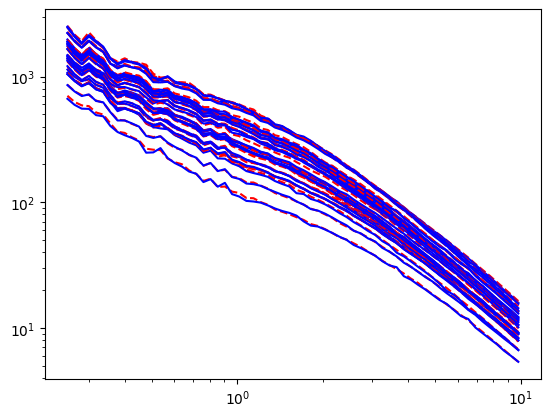

In [6]:
# Plot results
# plt.scatter(x, y, label="True Data")
# load k values

# plot in log-log scale
plt.figure()

# loop over all the test data
for i in range(y_pred.shape[0]):
    plt.loglog(k, y_test[i], color="red", linestyle="--", label="True Data") 
    # plt.loglog(k, y_h_pred[i], color="red", label="NN Prediction")
    plt.loglog(k, y_pred[i], color="blue", label="NN L1 Prediction")
# plt.legend()
plt.show()